In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
from typing import Iterable

In [2]:
root = Path('cifar_accuracies')
folds = 3
name = 'CIFAR-10'
to_file_base = 'cifar10_default'

if not os.path.isdir('plots'):
    os.mkdir('plots')

In [3]:
def queries(values, keys=None, without=None):
    "Get `values` that contain all `keys` without any values specified in `without`"
    if isinstance(keys, str):
        values = [v for v in values if keys in v]
    elif isinstance(keys, Iterable):
        for k in keys:
            values = [v for v in values if k in v]
    if isinstance(without, str):
        values = [v for v in values if without not in v]
    elif isinstance(without, Iterable):
        for n in without:
            values = [v for v in values if n not in v]
    return sorted(values)

In [4]:
experiments = [
    'accs_Lookahead_Adam',
    'accs_Lookahead_Adam_pullback',
    'accs_Lookahead_Adam_reset',
    'accs_Lookahead_SGD',
    'accs_Lookahead_SGD_pullback',
    'accs_Lookahead_SGD_reset',
    'accs_NestedLookahead_Adam',
    'accs_NestedLookahead_Adam_pullback',
    'accs_NestedLookahead_Adam_reset',
    'accs_NestedLookahead_SGD',
    'accs_NestedLookahead_SGD_pullback',
    'accs_NestedLookahead_SGD_reset',
    'accs_Adam',
    'accs_SGD',
]

# get file names
files = os.listdir(root)
test_files = queries(files, ['.csv','test'])
train_files = queries(files, ['.csv','train'])

exp_train = [] # train_files separated by experiment
exp_test = [] # test_files separated by experiment
for exp in experiments:
    if ('pullback' not in exp) and ('reset' not in exp):
        without=['pullback','reset']
    else:
        without=None

    exp_train.append(queries(train_files, keys=exp, without=without))
    exp_test.append(queries(test_files, keys=exp, without=without))
    
experiments = [exp[5:].replace('_',' ') for exp in experiments]

trains = []
tests = []
for i in range(len(experiments)):
    train = []
    for p in exp_train[i]:
        p = root/Path(p)
        train.append(pd.read_csv(p, index_col=0).to_numpy())
        
    test = []
    for p in exp_test[i]:
        p = root/Path(p)
        test.append(pd.read_csv(p, index_col=0).to_numpy())
    
    train, test = np.array(train)[:,:,0].T, np.array(test)[:,:,0].T
    trains.append(train)
    tests.append(test)

In [5]:
trains[0].shape

(15640, 3)

In [6]:
pallete = {
    'Lookahead Adam': 'red',
    'Lookahead Adam pullback': 'red',
    'Lookahead Adam reset': 'red',
    'Lookahead SGD': 'orange',
    'Lookahead SGD pullback': 'orange',
    'Lookahead SGD reset': 'orange',
    'NestedLookahead Adam': 'green',
    'NestedLookahead Adam pullback': 'green',
    'NestedLookahead Adam reset': 'green',
    'NestedLookahead SGD': 'blue',
    'NestedLookahead SGD pullback': 'blue',
    'NestedLookahead SGD reset': 'blue',
    'Adam': 'purple',
    'SGD': 'brown'
 }

In [7]:
def get_style(exp):
    "Gets linestyle for given experiment"
    if 'pullback' in exp:
        s = '--'
    elif 'reset' in exp:
        s = '-.'
    else:
        s = '-'
    return s

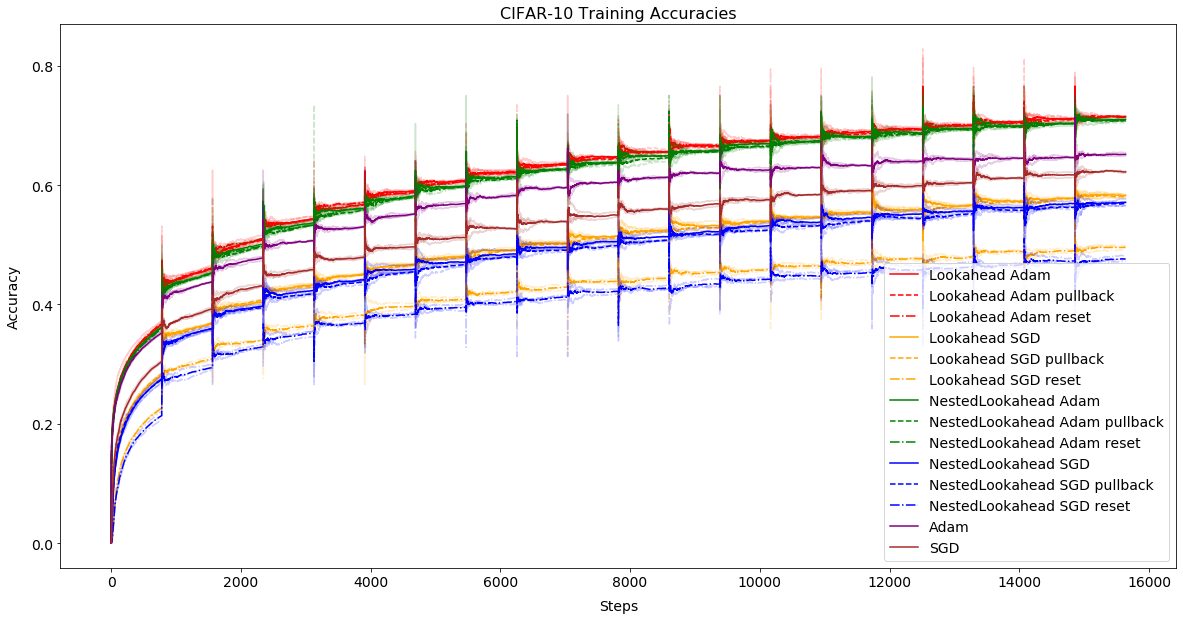

In [8]:
title_font = {'size':'16'}
axis_font = {'size':'14'}

plt.figure(figsize=(20,10))
plt.tick_params(labelsize=14)
plt.title(f"{name} Training Accuracies", **title_font)

for x in range(len(experiments)):
    styles = {'linestyle': get_style(experiments[x]), 'color': pallete[experiments[x]]}
    for i in range(folds):
        plt.plot(trains[x][:,i], alpha=0.2, **styles)
    plt.plot(trains[x].mean(axis=1), label=experiments[x], **styles)
    plt.xlabel('Steps', labelpad=10, **axis_font)
    plt.ylabel('Accuracy', labelpad=10, **axis_font)
    plt.legend(loc='lower right', prop=axis_font)
plt.savefig(f"plots/{to_file_base}_training_acc.png")
plt.show()

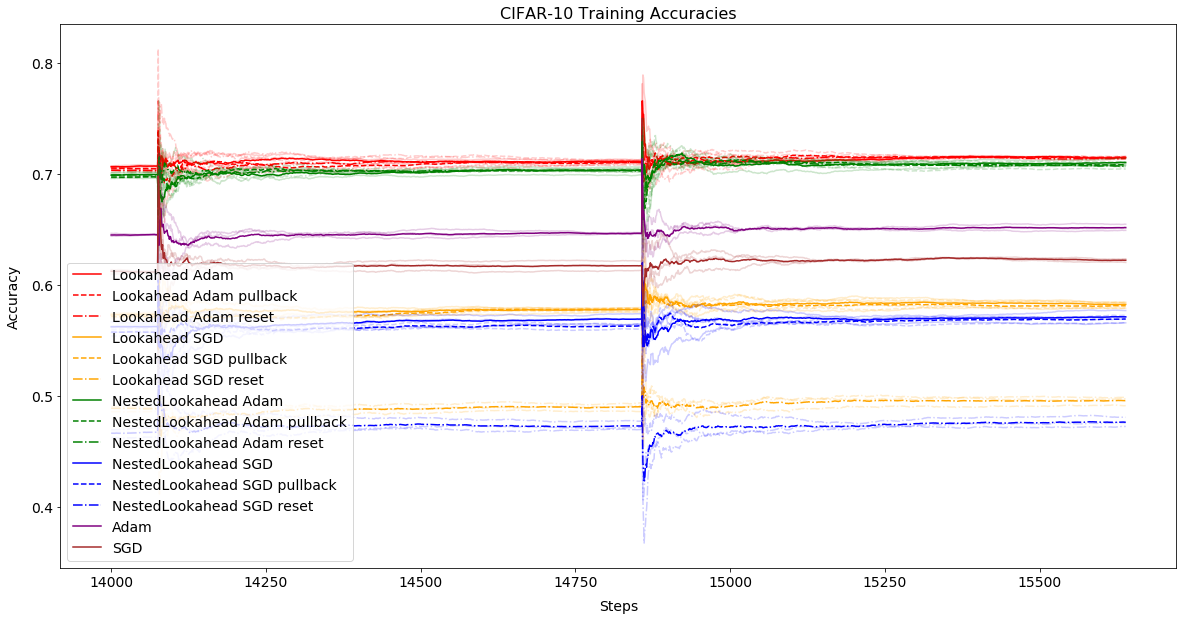

In [9]:
title_font = {'size':'16'}
axis_font = {'size':'14'}

plt.figure(figsize=(20,10))
plt.tick_params(labelsize=14)
plt.title(f"{name} Training Accuracies", **title_font)

for x in range(len(experiments)):
    styles = {'linestyle': get_style(experiments[x]), 'color': pallete[experiments[x]]}
    for i in range(folds):
        plt.plot(range(14000,15640), trains[x][14000:,i], alpha=0.2, **styles)
    plt.plot(range(14000,15640), trains[x][14000:,:].mean(axis=1), label=experiments[x], **styles)
    plt.xlabel('Steps', labelpad=10, **axis_font)
    plt.ylabel('Accuracy', labelpad=10, **axis_font)
    plt.legend(loc='lower left', prop=axis_font)
plt.savefig(f"plots/{to_file_base}_training_acc_tail.png")
plt.show()

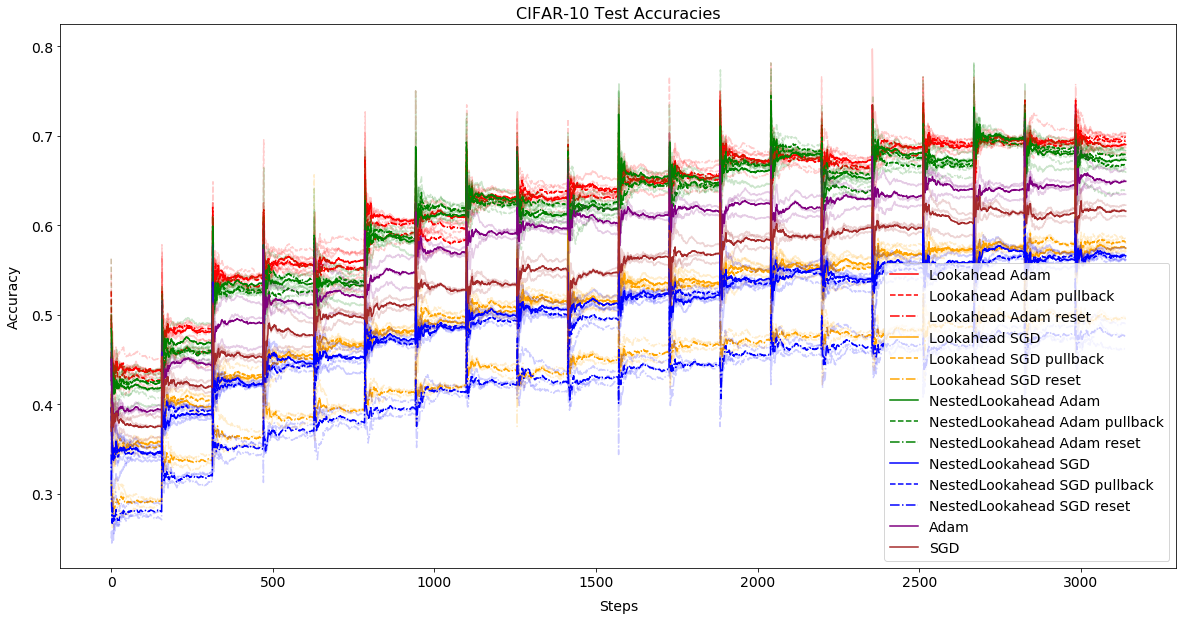

In [10]:
title_font = {'size':'16'}
axis_font = {'size':'14'}

plt.figure(figsize=(20,10))
plt.tick_params(labelsize=14)
plt.title(f"{name} Test Accuracies", **title_font)

for x in range(len(experiments)):
    styles = {'linestyle': get_style(experiments[x]), 'color': pallete[experiments[x]]}
    for i in range(folds):
        plt.plot(tests[x][:,i], alpha=0.2, **styles)
    plt.plot(tests[x].mean(axis=1), label=experiments[x], **styles)
    plt.xlabel('Steps', labelpad=10, **axis_font)
    plt.ylabel('Accuracy', labelpad=10, **axis_font)
    plt.legend(loc='lower right', prop=axis_font)
plt.savefig(f"plots/{to_file_base}_test_acc.png")
plt.show()

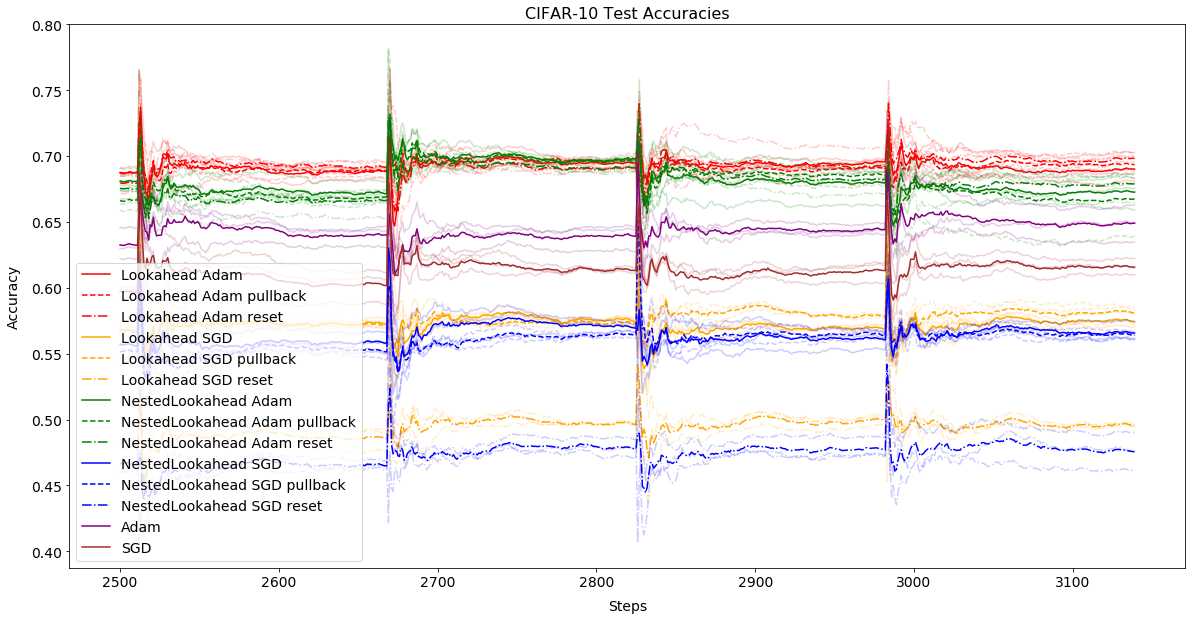

In [11]:

title_font = {'size':'16'}
axis_font = {'size':'14'}

plt.figure(figsize=(20,10))
plt.tick_params(labelsize=14)
plt.title(f"{name} Test Accuracies", **title_font)

for x in range(len(experiments)):
    styles = {'linestyle': get_style(experiments[x]), 'color': pallete[experiments[x]]}
    for i in range(folds):
        plt.plot(range(2500,3140), tests[x][2500:,i], alpha=0.2, **styles)
    plt.plot(range(2500,3140), tests[x][2500:,:].mean(axis=1), label=experiments[x], **styles)
    plt.xlabel('Steps', labelpad=10, **axis_font)
    plt.ylabel('Accuracy', labelpad=10, **axis_font)
    plt.legend(loc='lower left', prop=axis_font)
plt.savefig(f"plots/{to_file_base}_test_acc_tail.png")
plt.show()